Import necessary libraties.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

Data and data Statistics

In [ ]:
df=pd.read_csv('/content/healthcare-dataset-stroke-data.csv')
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [ ]:
#First 5 rows
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
#NULL Values in each column
print(df.isna())
print("number of null values in each column")
print(df.isna().sum())


         id  gender    age  hypertension  heart_disease  ever_married  \
0     False   False  False         False          False         False   
1     False   False  False         False          False         False   
2     False   False  False         False          False         False   
3     False   False  False         False          False         False   
4     False   False  False         False          False         False   
...     ...     ...    ...           ...            ...           ...   
5105  False   False  False         False          False         False   
5106  False   False  False         False          False         False   
5107  False   False  False         False          False         False   
5108  False   False  False         False          False         False   
5109  False   False  False         False          False         False   

      work_type  Residence_type  avg_glucose_level    bmi  smoking_status  \
0         False           False              F

<Axes: >

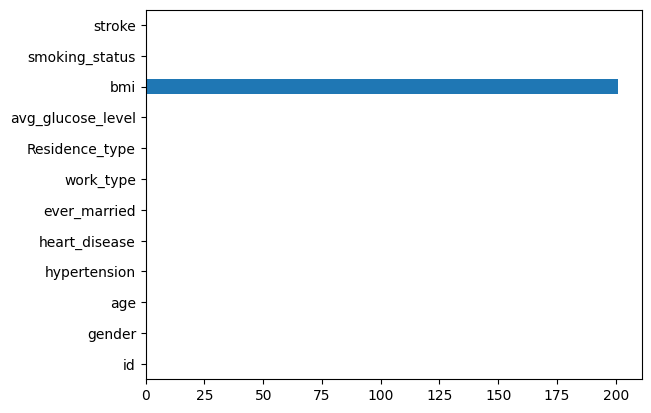

In [ ]:
#Bar graph for the number ofnull values
df.isna().sum().plot.barh()

In [ ]:
#Describing the data
df.describe()


,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [ ]:
#data type of all attributes and the number of NOT NULL values count is o
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


PreProcessing, Feature Selection and Feature Engineering

ID is useless for classification.

In [ ]:
#id has no significant importance on prediction we can drop that column
df=df.drop(['id'],axis=1)
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


Gender attribute analysis  and Visualization

In [ ]:
#check for outleirs in each column
df['gender'].value_counts()


Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [ ]:
#we can see that other count is 1 consider this a outlier
#we can remove the entire entity which has other gender
df=df[df['gender']!='Other']
df['gender'].value_counts()

Female    2994
Male      2115
Name: gender, dtype: int64

<Axes: ylabel='gender'>

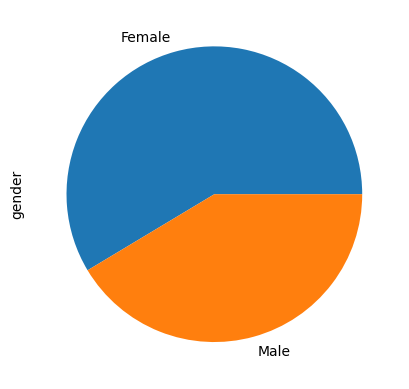

In [ ]:
#visualise the gender column using pie chart
df['gender'].value_counts().plot(kind="pie")

<Axes: >

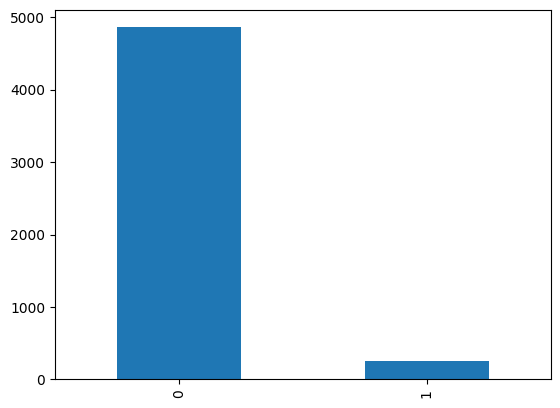

In [ ]:
#visualise the gender column counts using bar graph
df['stroke'].value_counts().plot(kind="bar")

Target Feature and analysis.
0 indicates no stroke
1 indicates stroke

In [ ]:
#counts in the stroke attribute
df['stroke'].value_counts()

0    4860
1     249
Name: stroke, dtype: int64

In [ ]:
#percentage of instances who got stroke
print("percentage of people who got stroke is: ",end=" ")
print(df['stroke'].sum()/len(df)*100)

percentage of people who got stroke is:  4.873752201996477


<Axes: ylabel='stroke'>

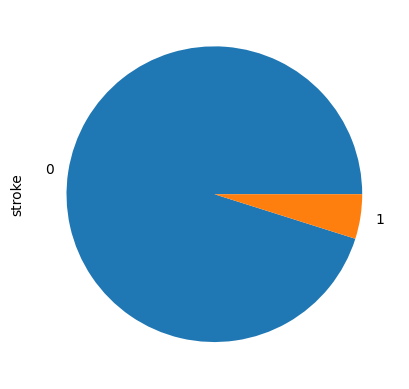

In [ ]:
#visualise the stroke value counts
df['stroke'].value_counts().plot(kind="pie")

<Axes: >

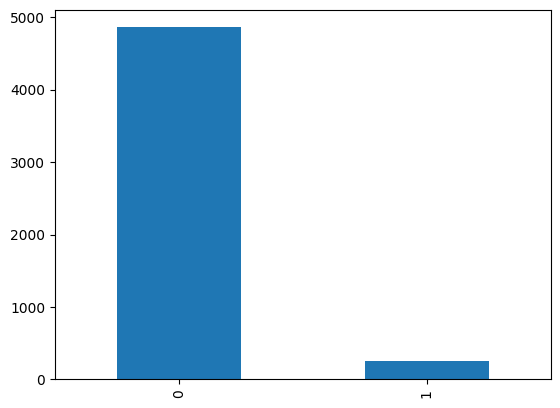

In [ ]:
#using bar graph
df['stroke'].value_counts().plot(kind="bar")

In [ ]:
print("The stroke possiblity 0 : ",end=" ")
print(df['stroke'].value_counts()[0])
print("Number of 1's in target feature: ",end=" ")
print(df['stroke'].value_counts()[1])

The stroke possiblity 0 :  4860
Number of 1's in target feature:  249


In [ ]:
print("Percentage of people with stroke and without stroke: ",end=" ")
print((df['stroke'].value_counts()[1]/df['stroke'].value_counts()[0])*100)

Percentage of people with stroke and without stroke:  5.1234567901234565


Hyper - tension attribute analysis and visualization.

In [ ]:
#attribute hyper tension analysis
#1 indicates the presence of hyper tension
#0 indicates the absence of hyper tension
df['hypertension'].value_counts()

0    4611
1     498
Name: hypertension, dtype: int64

<Axes: ylabel='hypertension'>

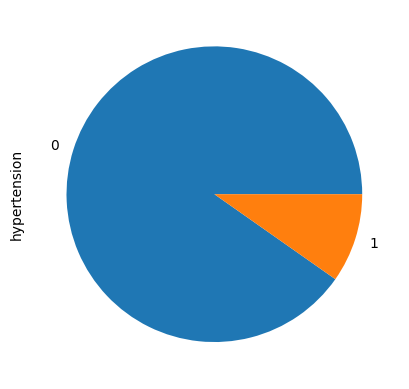

In [ ]:
#visualiztion of feature using pie chart
df['hypertension'].value_counts().plot(kind="pie")

<Axes: >

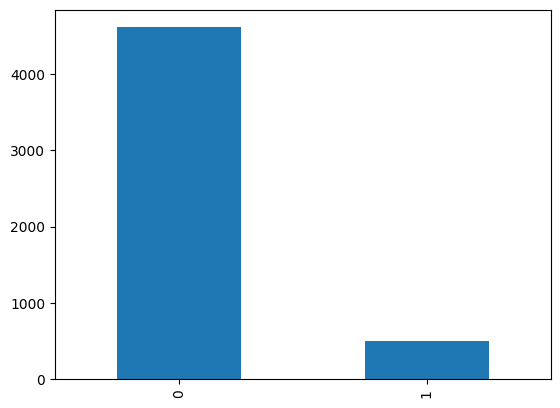

In [ ]:
#using bar graph
df['hypertension'].value_counts().plot(kind="bar")

Work type attribute analysis and visualization

In [ ]:
#feature work type analysis
df['work_type'].value_counts()

Private          2924
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

<Axes: ylabel='work_type'>

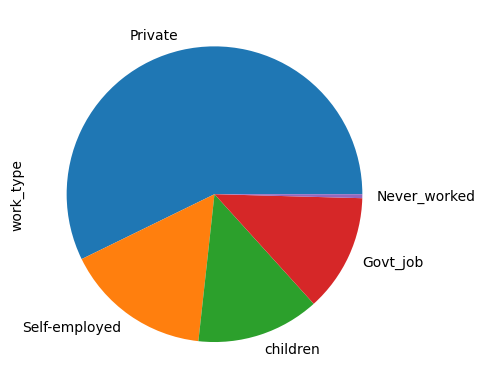

In [ ]:
#visualize using pie chart
df['work_type'].value_counts().plot(kind="pie")

<Axes: >

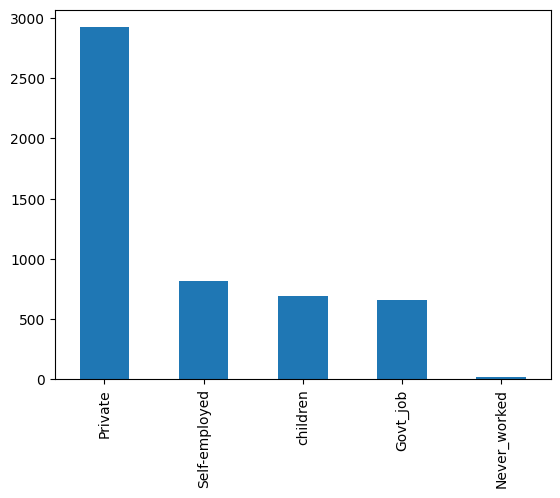

In [ ]:
#Visualizing using bar graph
df['work_type'].value_counts().plot(kind="bar")

Smoking status analysis and visualization

In [ ]:
#Smoking Status Attribute analysis
df['smoking_status'].value_counts()

never smoked       1892
Unknown            1544
formerly smoked     884
smokes              789
Name: smoking_status, dtype: int64

<Axes: ylabel='smoking_status'>

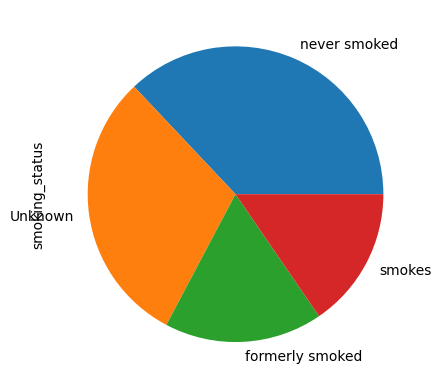

In [ ]:
#graphical representation of value counts of smoking status attribute
df['smoking_status'].value_counts().plot(kind="pie")

<Axes: >

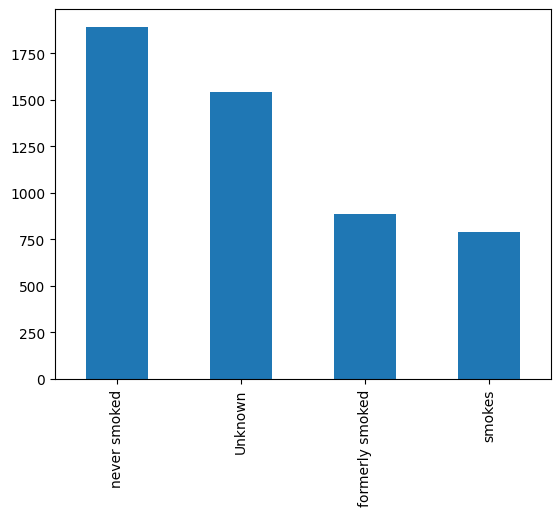

In [ ]:
#visualize using bar graph
df['smoking_status'].value_counts().plot(kind="bar")

Residence type attribute analysis and visualization.

In [ ]:
#residence type analysis
df['Residence_type'].value_counts()

Urban    2596
Rural    2513
Name: Residence_type, dtype: int64

<Axes: ylabel='Residence_type'>

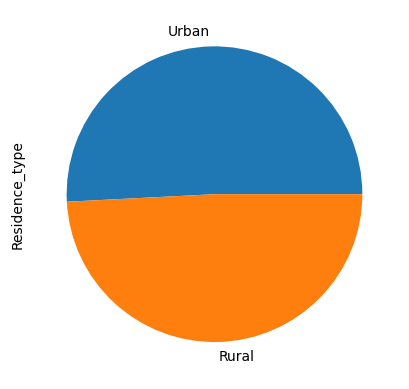

In [ ]:
#visulaising the residence type using pie chart
df['Residence_type'].value_counts().plot(kind="pie")

<Axes: >

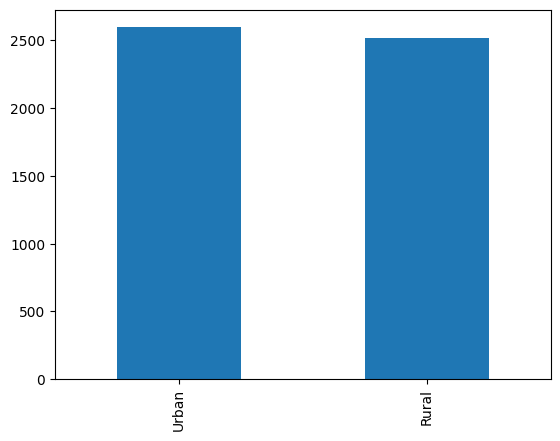

In [ ]:
#visualizing the residence type attribute using bar graph
df['Residence_type'].value_counts().plot(kind="bar")

BMI feature analysis,Visualization and outliers finding

In [ ]:
#BMI attribute analysis
#it has continous values.
#check for the null values
print("NUmber of numm values are: ",end=" ")
df['bmi'].isnull().sum()

NUmber of numm values are:  

201

<Axes: xlabel='bmi', ylabel='Count'>

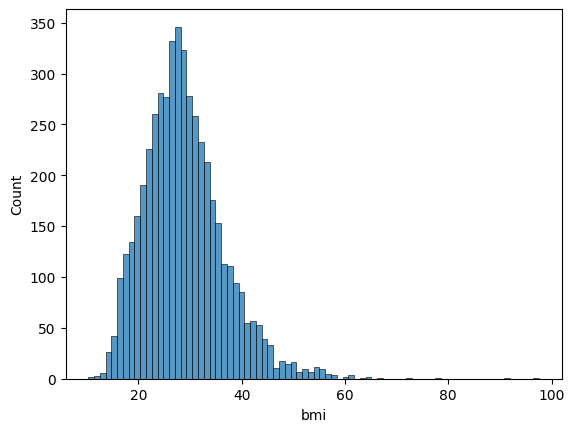

In [ ]:
#visualize the bmi attribute using histogram
sns.histplot(data=df['bmi'])

In [ ]:
#bmi is rightly skewed
print(df['bmi'].skew())

1.0550629490426457


<Axes: >

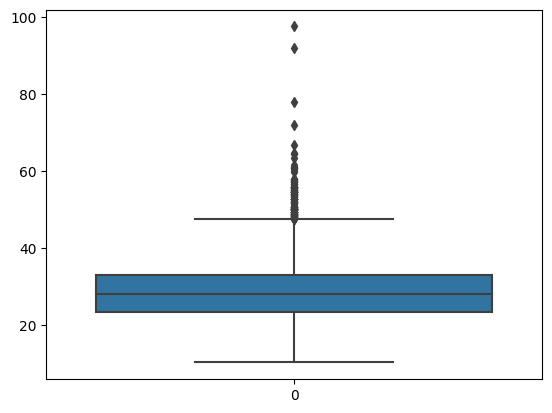

In [ ]:
#visualise using box plot and find the ouliers.
sns.boxplot(data=df['bmi'])

In [ ]:
#findiing the count of outlier based on those instances which are out of IQr
q1=df['bmi'].quantile(0.25)
q3=df['bmi'].quantile(0.75)
iqr=q3-q1
o=( df['bmi']<(q1-1.5*iqr))|(df['bmi']>(q3+1.5*iqr))
o

0       False
1       False
2       False
3       False
4       False
        ...  
5105    False
5106    False
5107    False
5108    False
5109    False
Name: bmi, Length: 5109, dtype: bool

In [ ]:
#count
o.value_counts()

False    4999
True      110
Name: bmi, dtype: int64

In [ ]:
#so according to +-1.5*IQR there are 110 outliers in the BMI attribute
#calculate the number of null values in the bmi attribute
print("number of null values is : ",df['bmi'].isna().sum())
print("Percentage of null values in the whole attribute is: ",(df['bmi'].isna().sum()/len(df['bmi']))*100)

number of null values is :  201
Percentage of null values in the whole attribute is:  3.9342337052260716


In [ ]:
#Now check for the stroke status for the null values in bmi index
df_na=df.loc[df['bmi'].isnull()]
g=df_na['stroke'].sum()
print("People who got stroke and their BMI is NA: ",g)
h=df['stroke'].sum()
print("People who got stroke and their BMI is given: ",h)
print("Percentage of people with stroke of BMI null to overall attribute: ",g/h*100)

People who got stroke and their BMI is NA:  40
People who got stroke and their BMI is given:  249
Percentage of people with stroke of BMI null to overall attribute:  16.06425702811245


In [ ]:
#Our main target function is stroke And the instances who got a stroke is in the minority - 249 Which is only 4.9 % of the instances
# Analysing whether to drop NA values in Bmi column
df_na=df.loc[df['bmi'].isnull()]
print("Nan BMI values where people have stroke:",df_na['stroke'].sum())
print("overall BMI values where people have stroke:",df['stroke'].sum())


Nan BMI values where people have stroke: 40
overall BMI values where people have stroke: 249


In [ ]:
#Among the 201 bmi NULL values 40 values in them got stroke
#Thus we cant drop NULL values
#Since there are outliers present we can’t perform mean imputation as mean is affected by the outliers
#Hence we impute it with median values
# Imputing the missing N/A values using the median of bmi column
print("median of bmi",df['bmi'].median())
df['bmi']=df['bmi'].fillna(df['bmi'].median())

median of bmi 28.1


<ipython-input-45-10e1d7547026>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['bmi']=df['bmi'].fillna(df['bmi'].median())


Age attribute analysis, visualization and outliers analysis.

<Axes: xlabel='age', ylabel='Count'>

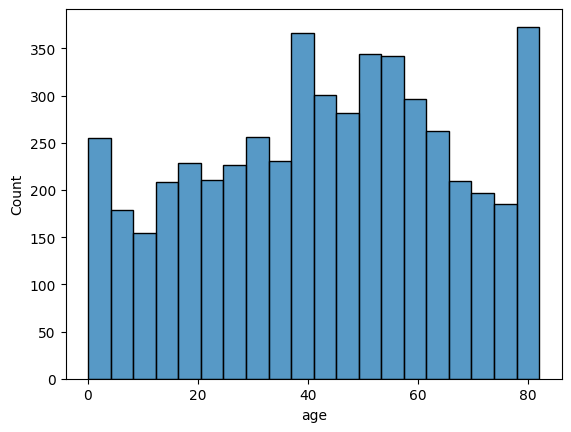

In [ ]:
#AGE ANALYSIS
#Visualise the age attribute using histogram
sns.histplot(data=df['age'])

<Axes: >

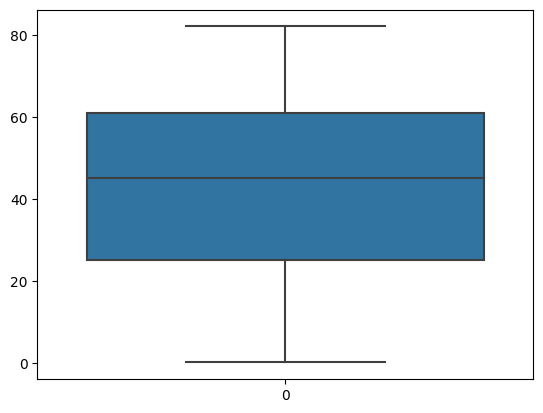

In [ ]:
#visualize usiing box plot for checking of outliers
sns.boxplot(data=df['age'])

In [ ]:
#from bos plot we can say that no outliers


Average Glucose level attibute analysis and visualization with outliers.

<Axes: xlabel='avg_glucose_level', ylabel='Count'>

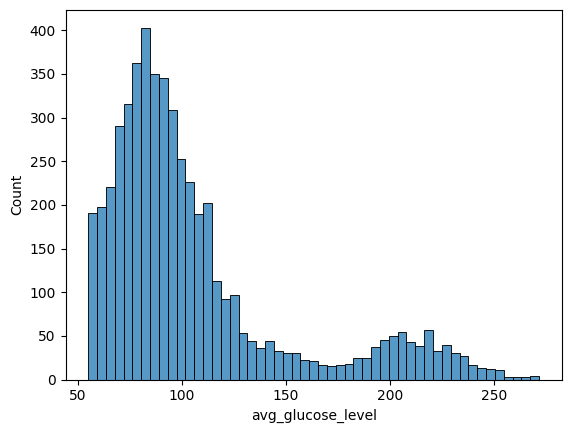

In [ ]:
#average glucose level analysis
sns.histplot(data=df['avg_glucose_level'])

<Axes: >

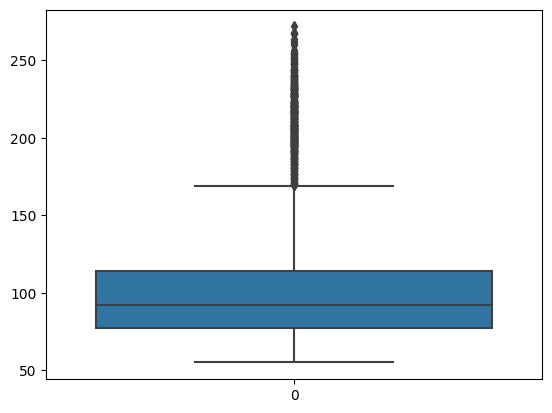

In [ ]:
#visualise using bos plot
sns.boxplot(data=df['avg_glucose_level'])

In [ ]:
#check for the skewness
if df['avg_glucose_level'].skew()>0:
  print("positive")
else:
  print("negative")
print(df['avg_glucose_level'].skew())

positive
1.5728153284961561


In [ ]:
#there are outliers in  the attribute which can be seen easily in the bos plot easily.
#manully find the count of outliers
q11=df['avg_glucose_level'].quantile(0.25)
q33=df['avg_glucose_level'].quantile(0.75)
iqrr=q33-q11
ds=(df['avg_glucose_level']<(q11-1.5*iqrr)) | (df['avg_glucose_level']>(q33+1.5*iqrr))
ds.value_counts()

False    4482
True      627
Name: avg_glucose_level, dtype: int64

Heart Disease attribute analysis and visualization.

In [ ]:
#heart disease analysis
df['heart_disease'].value_counts()

0    4833
1     276
Name: heart_disease, dtype: int64

<Axes: ylabel='heart_disease'>

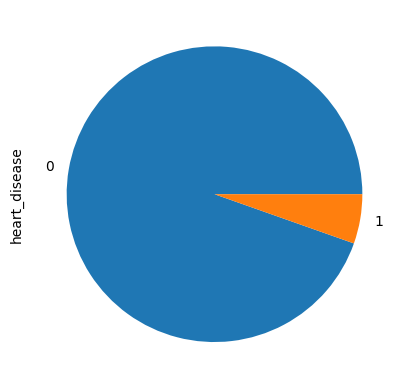

In [ ]:
#visualize the heart disease attribute using pie chart
df['heart_disease'].value_counts().plot(kind="pie")

<Axes: >

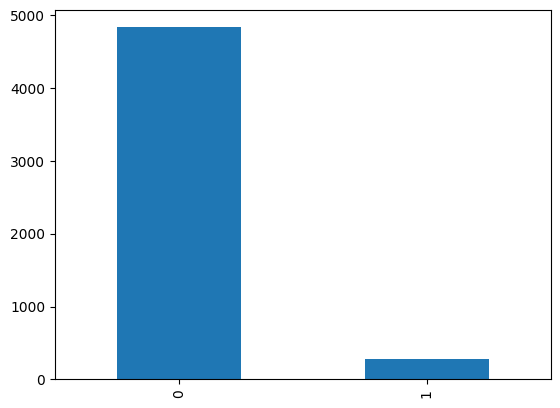

In [ ]:
#visualizee using the bar graph
df['heart_disease'].value_counts().plot(kind="bar")

Ever married feature analysis and visualization.

In [ ]:
#Ever married analysis
df['ever_married'].value_counts()

Yes    3353
No     1756
Name: ever_married, dtype: int64

<Axes: ylabel='ever_married'>

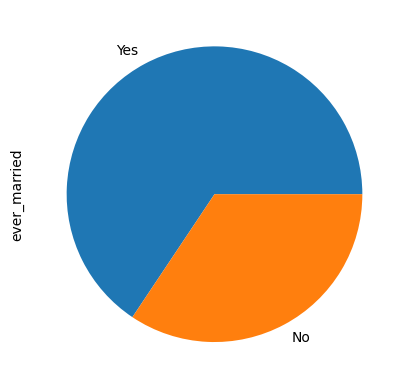

In [ ]:
#visualize using pie chart
df['ever_married'].value_counts().plot(kind="pie")

<Axes: >

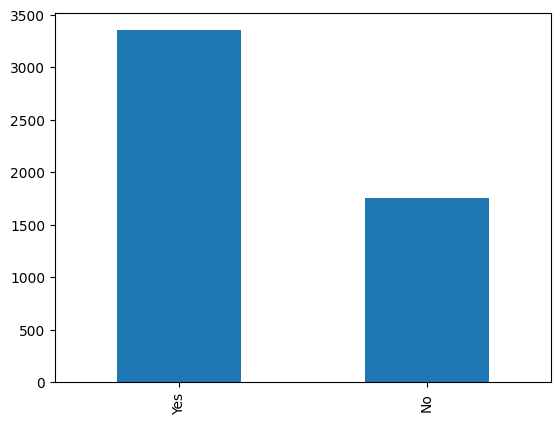

In [ ]:
#visualize the attribute using bar graph
df['ever_married'].value_counts().plot(kind="bar")

Correaltion Between the attributes in the dataset to find any attributes are correlated.

<ipython-input-59-ab0dfb0aef2e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat=df.corr()


<Axes: >

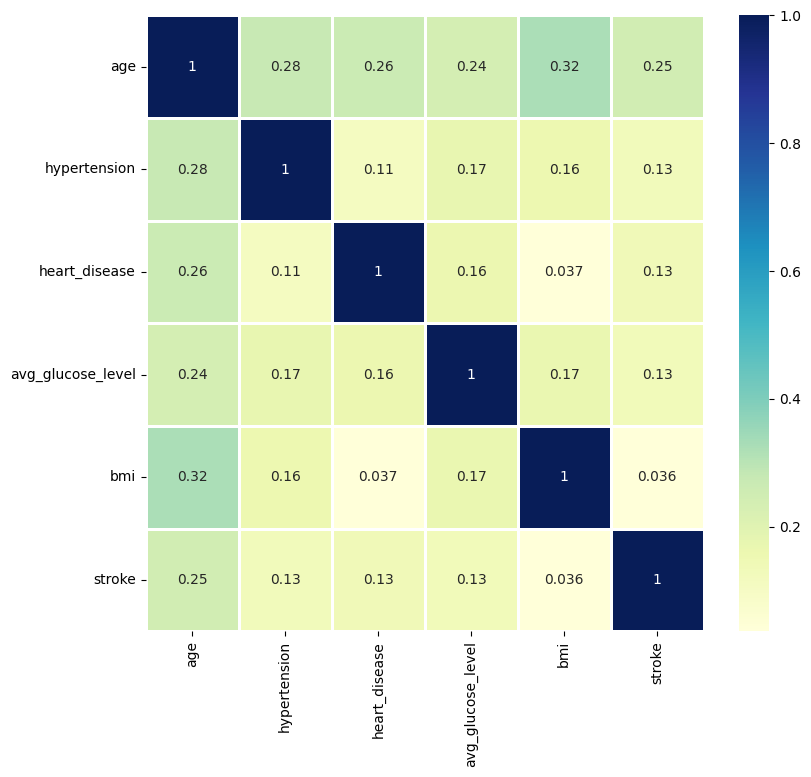

In [ ]:
corrmat=df.corr()
f,ax=plt.subplots(figsize=(9,8))
sns.heatmap(corrmat,ax=ax,cmap="YlGnBu",linewidth=0.8,annot=True)

There is a weak correlation between the attributes as per the plotted heatmap

The highest correlation found was between age and bmi - 0.32

Rest all correlations were less than 0.32

We could not drw any statistical insight from heatmap

**Cross analysis - all the attribute compared with target attribute. **

<Axes: xlabel='stroke', ylabel='count'>

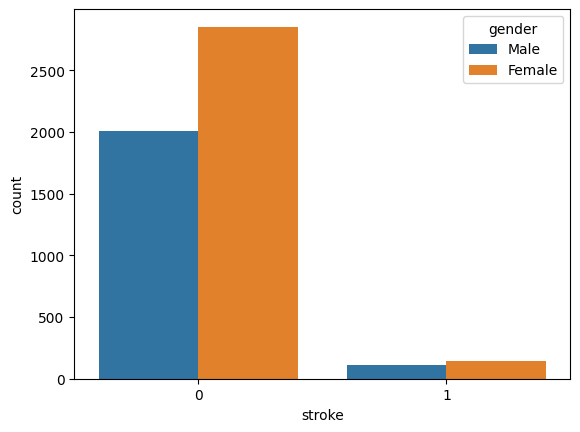

In [ ]:
sns.countplot(x='stroke',hue='gender',data=df)

<Axes: xlabel='stroke', ylabel='count'>

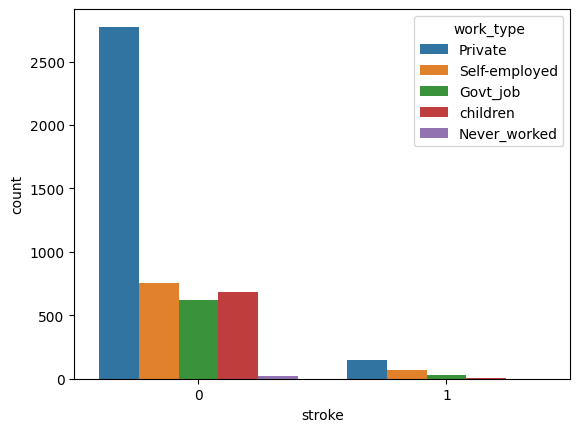

In [ ]:
sns.countplot(x='stroke',hue='work_type',data=df)

Based on this comparison we see in the provided dataset that people who never worked never got a heart attack and the people who are privetly employed got more strokes

<Axes: xlabel='stroke', ylabel='count'>

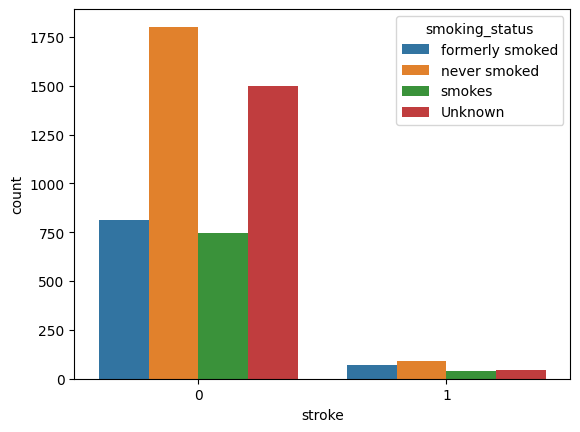

In [ ]:
sns.countplot(x='stroke',hue='smoking_status',data=df)

Based on the plot we can that those who formerly smoked got more strokes The people who smoked and never smoked has a somewhat same probability of getting stroke

<Axes: xlabel='stroke', ylabel='count'>

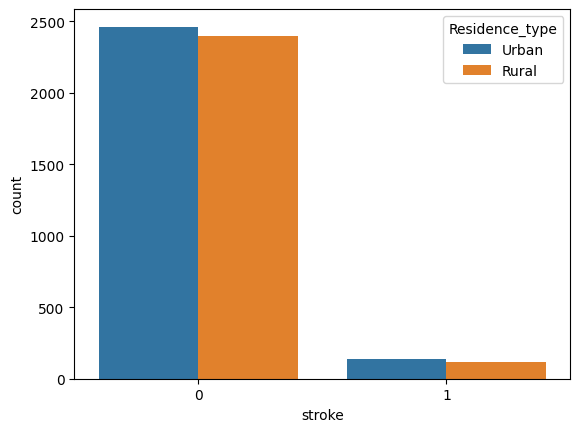

In [ ]:
sns.countplot(x='stroke', hue='Residence_type', data=df)


Based on the analysis the people who live in Urban areas were reported with more strokes


<Axes: xlabel='stroke', ylabel='count'>

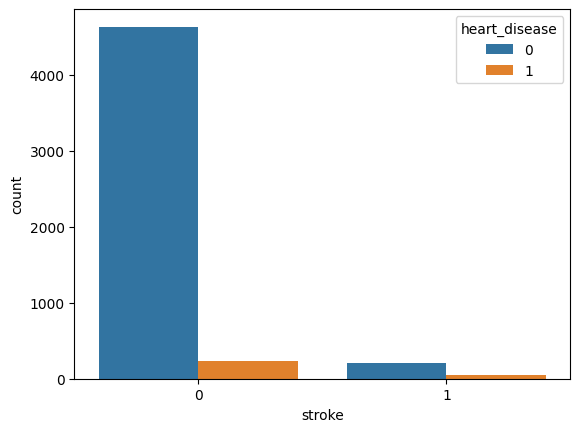

In [ ]:
sns.countplot(x='stroke', hue='heart_disease', data=df)


This plotting shows that the number of "people with Strokes but no heart disease" is approximately 6 to 8 times the number of "people with Strokes and also heart disease". This shows most of the people with no heart disease are suffering with Strokes compared to the once who have Heart Disease.


<Axes: xlabel='stroke', ylabel='count'>

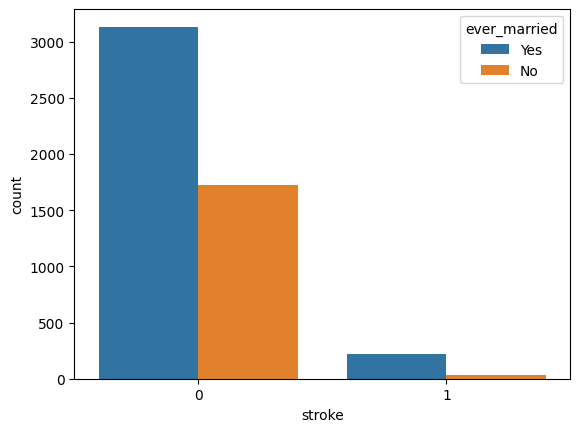

In [ ]:
sns.countplot(x='stroke', hue='ever_married', data=df)


This plotting shows that the number of "Married people with Strokes" is approximately 10 to 12 times the no. "Unmarried people with Strokes".
This shows most of the Married people got Strokes compared to Unmarried people.

ONE HOT ENCODING
Creating Dummy variables for numeric-binary attributes.

In [ ]:
# Converting numeric-binary value attributes to string
#take the testing input here and merge it with dataframe and doing one hot encoding

df[['hypertension', 'heart_disease', 'stroke']] = df[['hypertension', 'heart_disease', 'stroke']].astype(str)
# Generating dummy attributes - one hot encoding format
df = pd.get_dummies(df, drop_first= True)

<ipython-input-66-dd833311983f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['hypertension', 'heart_disease', 'stroke']] = df[['hypertension', 'heart_disease', 'stroke']].astype(str)


In [ ]:
df.head()

,age,avg_glucose_level,bmi,gender_Male,hypertension_1,heart_disease_1,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,stroke_1
0,67.0,228.69,36.6,1,0,1,1,0,1,0,0,1,1,0,0,1
1,61.0,202.21,28.1,0,0,0,1,0,0,1,0,0,0,1,0,1
2,80.0,105.92,32.5,1,0,1,1,0,1,0,0,0,0,1,0,1
3,49.0,171.23,34.4,0,0,0,1,0,1,0,0,1,0,0,1,1
4,79.0,174.12,24.0,0,1,0,1,0,0,1,0,0,0,1,0,1


In [ ]:
# Since our Dataset is highly undersampled (based on target instances) we are going to perform a over sampling method to have equal representation of both the target classes
# Using random oversampling - importing the library
from imblearn.over_sampling import RandomOverSampler

# Performing a minority oversampling
oversample = RandomOverSampler(sampling_strategy='minority')
X=df.drop(['stroke_1'],axis=1)
y=df['stroke_1']

# Obtaining the oversampled dataframes - testing and training
X_over, y_over = oversample.fit_resample(X, y)

Spliting the data into test and train

In [ ]:
# creating dataset split for training and testing the model
from sklearn.model_selection import train_test_split
# Performing a 80-20 test-train split
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size= 0.20, random_state=42)

In [ ]:
X_train

,age,avg_glucose_level,bmi,gender_Male,hypertension_1,heart_disease_1,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
7609,77.0,231.56,36.9,0,0,1,1,0,1,0,0,0,0,1,0
1739,16.0,88.85,27.1,0,0,0,0,0,0,1,0,1,0,0,0
2098,43.0,75.77,20.4,0,0,0,1,0,0,1,0,1,1,0,0
8948,82.0,59.32,33.2,0,0,0,1,0,1,0,0,0,0,1,0
2373,62.0,74.32,34.0,0,1,0,1,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,75.0,199.20,26.6,0,0,0,1,0,1,0,0,0,0,0,0
5191,38.0,101.45,28.1,0,0,0,1,0,1,0,0,0,1,0,0
5390,80.0,252.72,30.5,1,0,1,1,0,0,1,0,1,1,0,0
860,46.0,100.15,50.3,0,0,0,1,0,1,0,0,0,0,0,1


Model Selection and Training the model


Perceptron Model using standard library

In [ ]:
from sklearn.linear_model import Perceptron
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the perceptron
clf1 = Perceptron(tol=1e-4, random_state=42)
clf1.fit(X_train, y_train)

# Make predictions on the test set
predictions = clf1.predict(X_test)

In [ ]:
#li=df.columns
# columns1=[]
# for i in range(len(li)-1):
#   t=int(input(f"enter {li[i]} "))
#   columns1.append(t)
# n=np.array(columns1)
# y_testcase = clf1.predict([n])
# y_testcase

XGBClassifier from xgboost

Accuracy: 0.9763374485596708
ROC AUC Score: 0.9996274217585693


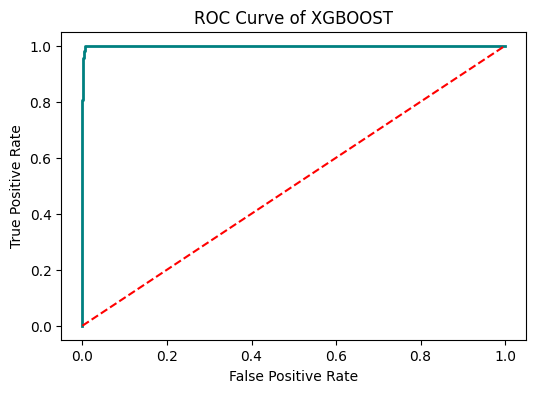

Accuracy_score: 0.9763374485596708
Precision_score: 0.9546351084812623
Recall_score: 1.0
f1_score: 0.9767911200807265
ROC AUC Score: 0.9996274217585693


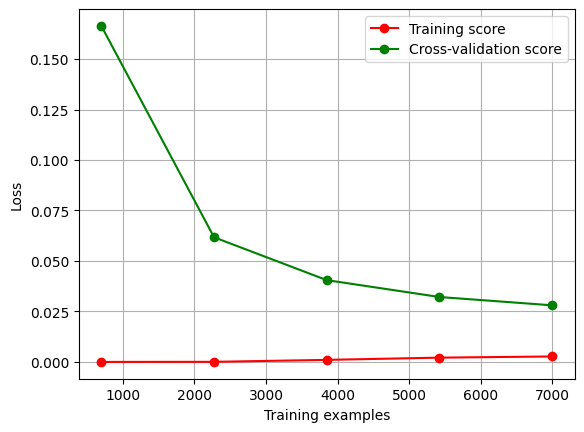

In [ ]:
from xgboost  import XGBClassifier
from sklearn.metrics import roc_auc_score,roc_curve,accuracy_score

# Create the classifier object
xgb = XGBClassifier()
# Training the classifier
xgb.fit(X_train,y_train)
#predicting result using the test dataset
y_pred_xgb = xgb.predict(X_test)
y_pred_prob_xgb = xgb.predict_proba(X_test)[:, 1]

# Printing the accuracy and roc-auc score of the model
print('Accuracy:', accuracy_score(y_test, y_pred_xgb))
print('ROC AUC Score:', roc_auc_score(y_test, y_pred_prob_xgb))

# plots of roc_auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_xgb)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, linewidth=2, color= 'teal')
plt.plot([0,1], [0,1], 'r--' )
plt.title('ROC Curve of XGBOOST')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

# from sklearn.metrics import plot_confusion_matrix,precision_recall_fscore_support
# plot_confusion_matrix(xgb,X_test,y_test)
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
print("Accuracy_score:",accuracy_score(y_test,y_pred_xgb))
print("Precision_score:",precision_score(y_test,y_pred_xgb))
print("Recall_score:",recall_score(y_test,y_pred_xgb))
print("f1_score:",f1_score(y_test,y_pred_xgb))
print('ROC AUC Score:', roc_auc_score(y_test, y_pred_prob_xgb))
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
clf_xgb = Perceptron(tol=1e-3, random_state=42)
clf_xgb.fit(X_train, y_train)
predictions = clf_xgb.predict(X_test)

from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(xgb, X_train, y_train, cv=10, scoring='neg_mean_squared_error')

train_scores_mean = -train_scores.mean(axis = 1)
test_scores_mean = -test_scores.mean(axis = 1)

plt.figure()
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.xlabel("Training examples")
plt.ylabel("Loss")
plt.legend(loc="best")
plt.grid()
plt.show()


In [ ]:
#li=df.columns
# columns2=[]
# for i in range(len(li)-1):
#   t=int(input(f"enter {li[i]} "))
#   columns2.append(t)
# n=np.array(columns2)
# y_testcase = clf_xgb.predict([n])
# y_testcase

SVM Model

Accuracy: 0.8410493827160493
Precision: 0.7934105075690115
Recall: 0.9204545454545454
F1 Score: 0.8522238163558106
ROC AUC Score: 0.8413748137108793


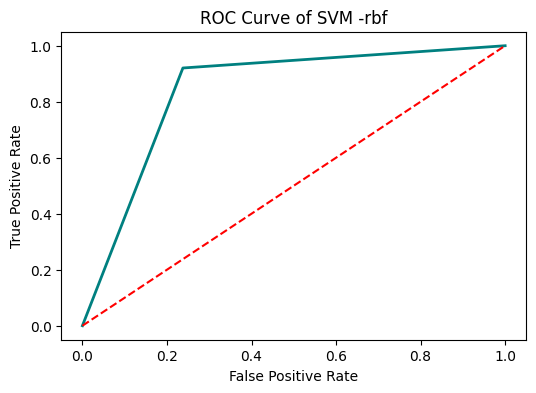

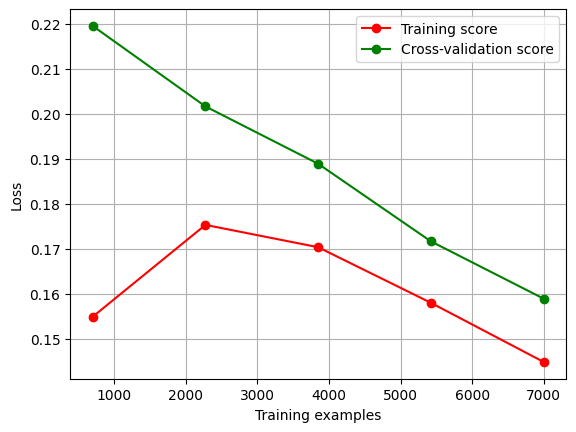

In [306]:
from sklearn import svm
clf_svm = svm.SVC(kernel='rbf')  # Linear Kernel
clf_svm.fit(X_train, y_train)

# Predict the response for the test dataset
y_pred = clf_svm.predict(X_test)

# Model Accuracy: how often is the classifier correct?
print("Accuracy:", accuracy_score(y_test, y_pred))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:", precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:", recall_score(y_test, y_pred))

# Model F1 Score: the weighted average of Precision and Recall
print("F1 Score:", f1_score(y_test, y_pred))
print('ROC AUC Score:', roc_auc_score(y_test, y_pred))
# plots of roc_auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, linewidth=2, color= 'teal')
plt.plot([0,1], [0,1], 'r--' )
plt.title('ROC Curve of SVM -rbf')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

print("\n")

from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(clf_svm, X_train, y_train, cv=10, scoring='neg_mean_squared_error')

train_scores_mean = -train_scores.mean(axis = 1)
test_scores_mean = -test_scores.mean(axis = 1)

plt.figure()
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.xlabel("Training examples")
plt.ylabel("Loss")
plt.legend(loc="best")
plt.grid()
plt.show()



In [ ]:
# misclassified_idx = np.where(y_test != y_pred)[0]
# num_misclassified = len(misclassified_idx)
# fig, axes = plt.subplots(1, num_misclassified, figsize=(3 * num_misclassified, 12))

# misclassified_idx
z=clf_svm.predict([df.iloc[100,:-1]])
z

array([0], dtype=uint8)

In [ ]:
li=df.columns
li
columns=[]

In [ ]:
df.head()

,age,avg_glucose_level,bmi,gender_Male,hypertension_1,heart_disease_1,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,stroke_1
0,67.0,228.69,36.6,1,0,1,1,0,1,0,0,1,1,0,0,1
1,61.0,202.21,28.1,0,0,0,1,0,0,1,0,0,0,1,0,1
2,80.0,105.92,32.5,1,0,1,1,0,1,0,0,0,0,1,0,1
3,49.0,171.23,34.4,0,0,0,1,0,1,0,0,1,0,0,1,1
4,79.0,174.12,24.0,0,1,0,1,0,0,1,0,0,0,1,0,1


In [ ]:
#li=df.columns
# columns1=[]
# for i in range(len(li)-1):
#   t=int(input(f"enter {li[i]} "))
#   columns1.append(t)
# n=np.array(columns1)
# y_testcase = clf.predict([n])
# y_testcase

In [ ]:
df.iloc[100]

age                               64.0
avg_glucose_level                 74.1
bmi                               28.8
gender_Male                        1.0
hypertension_1                     0.0
heart_disease_1                    1.0
ever_married_Yes                   1.0
work_type_Never_worked             0.0
work_type_Private                  0.0
work_type_Self-employed            0.0
work_type_children                 0.0
Residence_type_Urban               1.0
smoking_status_formerly smoked     0.0
smoking_status_never smoked        0.0
smoking_status_smokes              0.0
stroke_1                           1.0
Name: 100, dtype: float64

In [ ]:
z=clf_xgb.predict([df.iloc[100,:-1]])
z

In [305]:
misclassified_idx = np.where(y_test != y_pred)[0]
num_misclassified = len(misclassified_idx)
fig, axes = plt.subplots(1, num_misclassified, figsize=(3 * num_misclassified, 12))

misclassified_idx

array([   5,    8,   16,   20,   36,   54,   59,   62,   68,   80,   85,
         91,   98,  110,  121,  124,  136,  142,  143,  150,  153,  162,
        165,  166,  194,  195,  206,  209,  240,  254,  257,  267,  269,
        271,  273,  282,  285,  290,  291,  301,  314,  320,  330,  339,
        343,  350,  359,  361,  366,  367,  371,  378,  390,  394,  397,
        402,  408,  414,  417,  421,  432,  433,  435,  437,  439,  440,
        444,  445,  462,  472,  476,  483,  485,  496,  497,  505,  537,
        539,  541,  550,  557,  561,  565,  569,  579,  580,  589,  598,
        600,  623,  624,  625,  642,  648,  652,  655,  657,  676,  678,
        706,  707,  711,  724,  731,  732,  742,  750,  755,  758,  762,
        766,  777,  781,  782,  792,  797,  800,  803,  807,  809,  811,
        817,  823,  826,  839,  845,  847,  860,  867,  872,  877,  880,
        882,  889,  892,  908,  910,  919,  928,  931,  932,  941,  948,
        974,  975,  976,  983,  992,  998, 1013, 10

Error in callback <function _draw_all_if_interactive at 0x78990afe5d80> (for post_execute):


ValueError: ignored

ValueError: ignored

<Figure size 92700x1200 with 309 Axes>

In [ ]:
y_test.shape


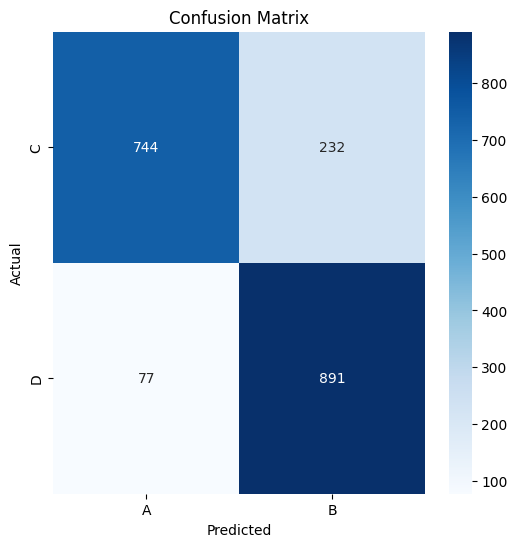

In [301]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["A","B"], yticklabels=["C","D"])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()